# Data Cleaning
Introduction
This notebook goes through a necessary step of any data science project - data cleaning. Data cleaning is a time consuming and unenjoyable task, yet it's a very important one. Keep in mind, "garbage in, garbage out". Feeding dirty data into a model will give us results that are meaningless.

Specifically, we'll be walking through:

*Getting the data - *in this case, we'll be scraping data from https://www.kaggle.com/neisse/scrapped-lyrics-from-6-genres#lyrics-data.csv
*Cleaning the data - *we will walk through popular text pre-processing techniques
*Organizing the data - *we will organize the cleaned data into a way that is easy to input into other algorithms
The output of this notebook will be clean, organized data in two standard text formats:

Corpus - a collection of text
Document-Term Matrix - word counts in matrix format
Problem Statement
As a reminder, our goal is to look at lyrics of rock, pop, heap-hop and note their differences. Specifically, What words are the most used throughout each genre.

Getting The Data
in this case, we'll be scraping data from https://www.kaggle.com/neisse/scrapped-lyrics-from-6-genres#lyrics-data.csv



In [232]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline
import nltk
import sklearn
import nltk.collocations 
from nltk import FreqDist, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import string, re
import urllib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cmiw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cmiw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cmiw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\cmiw\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [233]:
import pandas

lyrics = pandas.read_csv('lyrics-data.csv')
english_songs = lyrics['Idiom'] =='ENGLISH'

In [234]:
english = lyrics[english_songs]

In [235]:
artist = pandas.read_csv('artists-data.csv')
print(artist.shape)
pop = artist['Genre'] == 'Pop'
rock = artist['Genre'] == 'Rock'
hiphop = artist['Genre'] == 'Hip Hop'

popsongs = artist[pop]
rocksongs = artist[rock]
hiphopsongs = artist[hiphop]

english_popsongs = pandas.merge(popsongs, english, left_on='Link', right_on='ALink')
english_popsongs.to_csv('englishPopSongs.csv', index=False)

english_rocksongs = pandas.merge(rocksongs, english, left_on='Link', right_on='ALink')
english_rocksongs.to_csv('englishRockSongs.csv', index=False)

english_hiphopsongs = pandas.merge(hiphopsongs, english, left_on='Link', right_on='ALink')
english_hiphopsongs.to_csv('englishHipHopSongs.csv', index=False)

(3242, 6)


In [236]:
import pandas as pd

frames = [english_popsongs, english_rocksongs, english_hiphopsongs] 
english_allsong = pd.concat(frames)
english_allsong

Artist  Songs  Popularity  \
0                       Adam Lambert    110         1.4   
1                       Adam Lambert    110         1.4   
2                       Adam Lambert    110         1.4   
3                       Adam Lambert    110         1.4   
4                       Adam Lambert    110         1.4   
...                              ...    ...         ...   
23103                            US5     42         0.1   
23104                            US5     42         0.1   
23105                   Furacão 2000     57         2.8   
23106  Pancadão do Caldeirão do Huck     30         0.2   
23107  Pancadão do Caldeirão do Huck     30         0.2   

                                  Link    Genre  \
0                       /adam-lambert/      Pop   
1                       /adam-lambert/      Pop   
2                       /adam-lambert/      Pop   
3                       /adam-lambert/      Pop   
4                       /adam-lambert/      Pop   
...                                ...      ...   
23103                            /us5/  Hip Hop   
23104                            /us5/  Hip Hop   
23105                   /furacao-2000/  Hip Hop   
23106  /pancadao-do-caldeirao-do-huck/  Hip Hop   
23107  /pancadao-do-caldeirao-do-huck/  Hip Hop   

                                                  Genres  \
0      Pop; Pop/Rock; Rock; Romântico; Dance; Electro...   
1      Pop; Pop/Rock; Rock; Romântico; Dance; Electro...   
2      Pop; Pop/Rock; Rock; Romântico; Dance; Electro...   
3      Pop; Pop/Rock; Rock; Romântico; Dance; Electro...   
4      Pop; Pop/Rock; Rock; Romântico; Dance; Electro...   
...                                                  ...   
23103   Pop; Dance; Hip Hop; Romântico; World Music; R&B   
23104   Pop; Dance; Hip Hop; Romântico; World Music; R&B   
23105  Funk Carioca; Axé; Hip Hop; Rap; Dance; Funk; ...   
23106  Funk Carioca; Electronica; Hip Hop; Black Musi...   
23107  Funk Carioca; Electronica; Hip Hop; Black Musi...   

                                 ALink  \
0                       /adam-lambert/   
1                       /adam-lambert/   
2                       /adam-lambert/   
3                       /adam-lambert/   
4                       /adam-lambert/   
...                                ...   
23103                            /us5/   
23104                            /us5/   
23105                   /furacao-2000/   
23106  /pancadao-do-caldeirao-do-huck/   
23107  /pancadao-do-caldeirao-do-huck/   

                                                 SName  \
0                                 Whataya Want From Me   
1                                           Ghost Town   
2      We Are The Champions (feat. Kris Allen & Queen)   
3                                         If I Had You   
4                                 Never Close Our Eyes   
...                                                ...   
23103                                   Work Your Body   
23104                                        Your Love   
23105            How Can We Be Wrong (melô do Anjinho)   
23106                                Chanson Du Soleil   
23107                                Chanson Du Soleil   

                                                   SLink  \
0                /adam-lambert/whataya-want-from-me.html   
1                          /adam-lambert/ghost-town.html   
2      /adam-lambert/we-are-the-champions-feat-kris-a...   
3                        /adam-lambert/if-i-had-you.html   
4                /adam-lambert/never-close-our-eyes.html   
...                                                  ...   
23103                           /us5/work-your-body.html   
23104                                /us5/your-love.html   
23105  /furacao-2000/how-can-we-be-wrong-melo-do-anji...   
23106  /pancadao-do-caldeirao-do-huck/chanson-du-sole...   
23107  /pancadao-do-caldeirao-do-huck/chanson-du-sole...   

                                                   Lyric    Idio

# Drop rows with NAN values for column song

In [237]:
english_allsong.dropna(inplace = True)
english_allsong.isna().sum()
english_allsong.reset_index(inplace = True)

In [238]:
english_allsong.tail()

index                         Artist  Songs  Popularity  \
123981  23103                            US5     42         0.1   
123982  23104                            US5     42         0.1   
123983  23105                   Furacão 2000     57         2.8   
123984  23106  Pancadão do Caldeirão do Huck     30         0.2   
123985  23107  Pancadão do Caldeirão do Huck     30         0.2   

                                   Link    Genre  \
123981                            /us5/  Hip Hop   
123982                            /us5/  Hip Hop   
123983                   /furacao-2000/  Hip Hop   
123984  /pancadao-do-caldeirao-do-huck/  Hip Hop   
123985  /pancadao-do-caldeirao-do-huck/  Hip Hop   

                                                   Genres  \
123981   Pop; Dance; Hip Hop; Romântico; World Music; R&B   
123982   Pop; Dance; Hip Hop; Romântico; World Music; R&B   
123983  Funk Carioca; Axé; Hip Hop; Rap; Dance; Funk; ...   
123984  Funk Carioca; Electronica; Hip Hop; Black Musi...   
123985  Funk Carioca; Electronica; Hip Hop; Black Musi...   

                                  ALink  \
123981                            /us5/   
123982                            /us5/   
123983                   /furacao-2000/   
123984  /pancadao-do-caldeirao-do-huck/   
123985  /pancadao-do-caldeirao-do-huck/   

                                        SName  \
123981                         Work Your Body   
123982                              Your Love   
123983  How Can We Be Wrong (melô do Anjinho)   
123984                      Chanson Du Soleil   
123985                      Chanson Du Soleil   

                                                    SLink  \
123981                           /us5/work-your-body.html   
123982                                /us5/your-love.html   
123983  /furacao-2000/how-can-we-be-wrong-melo-do-anji...   
123984  /pancadao-do-caldeirao-do-huck/chanson-du-sole...   
123985  /pancadao-do-caldeirao-do-huck/chanson-du-sole...   

                                                    Lyric    Idiom  
123981  Work your body. I thought I told ya that we wo...  ENGLISH  
123982  Verse 1. Girl, the only way to make things rig...  ENGLISH  
123983  How long can we both go on this way. Why can't...  ENGLISH  
123984  Back in the day. I wasn't sure. You were afrai...  ENGLISH  
123985  Back in the day. I wasn't sure. You were afrai...  ENGLISH

In [239]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?_\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [240]:
data_clean = pandas.DataFrame(english_allsong['Lyric'].apply(round1))
Genre_list = english_allsong['Genre']
data_clean['Genre'] = Genre_list
data_clean

Lyric    Genre
0       hey slow it down what do you want from me what...      Pop
1       died last night in my dreams walking the stree...      Pop
2       ive paid my dues time after time ive done my s...      Pop
3       so i got my boots on got the right amount of l...      Pop
4       i wish that this night would never be over the...      Pop
...                                                   ...      ...
123981  work your body i thought i told ya that we won...  Hip Hop
123982  verse  girl the only way to make things right ...  Hip Hop
123983  how long can we both go on this way why cant y...  Hip Hop
123984  back in the day i wasnt sure you were afraid w...  Hip Hop
123985  back in the day i wasnt sure you were afraid w...  Hip Hop

[123986 rows x 2 columns]

In [241]:
import nltk
#nltk.download('words')
#nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lyrics_list = list(data_clean.Lyric)

pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer("english")
english = list(set(nltk.corpus.words.words()))

def clean_docs_lemma(lyrics_list):
    cleaned = []
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    for lyric in lyrics_list:
        clean_lyric = nltk.regexp_tokenize(lyric, pattern)
        lyric_lower = [i.lower() for i in clean_lyric]
        stop_words = stopwords.words('english')
        stopwords_list = stop_words + list(string.punctuation)
        stopwords_list += ["''", '""', '...', '``']
        lyrics_tokens_stopped = [w for w in lyric_lower if not w in stopwords_list]
        lyric_lemmas = [lemmatizer.lemmatize(word) for word in lyrics_tokens_stopped]
        c = " ".join(lyric_lemmas)
        cleaned.append(c)
    return cleaned

def clean_docs_stemma(lyrics_list):
    cleaned = []
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    for lyric in lyrics_list:
        clean_lyric = nltk.regexp_tokenize(lyric, pattern)
        lyric_lower = [i.lower() for i in clean_lyric]
        stop_words = stopwords.words('english')
        stopwords_list = stop_words + list(string.punctuation)
        stopwords_list += ["''", '""', '...', '``']
        lyrics_tokens_stopped = [w for w in lyric_lower if not w in stopwords_list]
        lyric_stemmas = [stemmer.stem(word) for word in lyrics_tokens_stopped]
        c = " ".join(lyric_stemmas)
        cleaned.append(c)
    return cleaned

# First thing we wanted to do is test whether Lemmatizing works better than Stemmatizing
Stemmed Lyrics Test

In [242]:
data_clean.Genre.value_counts()

Rock       60584
Pop        40294
Hip Hop    23108
Name: Genre, dtype: int64

In [243]:
rock_df = data_clean[data_clean.Genre == "Rock"][:5000]
pop_df = data_clean[data_clean.Genre == "Pop"][:5000]
hip_df = data_clean[data_clean.Genre == "Hip Hop"][:5000]

In [244]:
data_clean.drop(data_clean[data_clean.Genre == "Rock"].index, inplace = True)
data_clean.drop(data_clean[data_clean.Genre == "Pop"].index, inplace = True)
data_clean.drop(data_clean[data_clean.Genre == "Hip Hop"].index, inplace = True)

In [245]:
maybe_df = data_clean.append([rock_df, pop_df, hip_df])
maybe_df.Genre.value_counts()

Hip Hop    5000
Rock       5000
Pop        5000
Name: Genre, dtype: int64

In [246]:
maybe_df.reset_index(inplace = True)
maybe_df.drop(columns = ["index"], axis = 1, inplace = True)

In [247]:
maybe_df.head()

Lyric Genre
0  i could feel at the time there was no way of k...  Rock
1  take me now baby here as i am hold me close an...  Rock
2  these are these are days youll remember never ...  Rock
3  a lie to say o my mountain has coal veins and ...  Rock
4  trudging slowly over wet sand back to the benc...  Rock

In [248]:
import nltk
#nltk.download('words')
#nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lyrics_list = list(maybe_df.Lyric)

pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer("english")
english = list(set(nltk.corpus.words.words()))

def clean_docs_lemma(lyrics_list):
    cleaned = []
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    for lyric in lyrics_list:
        clean_lyric = nltk.regexp_tokenize(lyric, pattern)
        lyric_lower = [i.lower() for i in clean_lyric]
        stop_words = stopwords.words('english')
        stopwords_list = stop_words + list(string.punctuation)
        stopwords_list += ["''", '""', '...', '``']
        lyrics_tokens_stopped = [w for w in lyric_lower if not w in stopwords_list]
        lyric_lemmas = [lemmatizer.lemmatize(word) for word in lyrics_tokens_stopped]
        c = " ".join(lyric_lemmas)
        cleaned.append(c)
    return cleaned

def clean_docs_stemma(lyrics_list):
    cleaned = []
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    for lyric in lyrics_list:
        clean_lyric = nltk.regexp_tokenize(lyric, pattern)
        lyric_lower = [i.lower() for i in clean_lyric]
        stop_words = stopwords.words('english')
        stopwords_list = stop_words + list(string.punctuation)
        stopwords_list += ["''", '""', '...', '``']
        lyrics_tokens_stopped = [w for w in lyric_lower if not w in stopwords_list]
        lyric_stemmas = [stemmer.stem(word) for word in lyrics_tokens_stopped]
        c = " ".join(lyric_stemmas)
        cleaned.append(c)
    return cleaned

In [249]:
stemmed_lyrics = clean_docs_stemma(lyrics_list)

In [250]:
import nltk
nltk.download('punkt')
len(set(nltk.word_tokenize(" ".join(stemmed_lyrics))))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cmiw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


40922

In [251]:
X = stemmed_lyrics
y = maybe_df.Genre

len(X) == len(y)

True

In [252]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(stemmed_lyrics, maybe_df.Genre, test_size=0.2, random_state=18)

In [253]:
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

pipe_NB = Pipeline([('count_vectorizer', CountVectorizer()), 
                     ('tfidf_vectorizer', TfidfTransformer()),
                     ('clf', MultinomialNB())
                    ])

pipe_GBoost = Pipeline([('count_vectorizer', CountVectorizer()), 
                     ('tfidf_vectorizer', TfidfTransformer()),
                     ('clf', GradientBoostingClassifier(learning_rate=0.3))
                    ])

pipe_RF = Pipeline([('count_vectorizer', CountVectorizer()), 
                     ('tfidf_vectorizer', TfidfTransformer()),
                     ('clf', RandomForestClassifier())
                    ])

pipe_ADA = Pipeline([('count_vectorizer', CountVectorizer()), 
                     ('tfidf_vectorizer', TfidfTransformer()),
                     ('clf', AdaBoostClassifier(learning_rate=0.3))
                    ])


pipe_KNN = Pipeline([('count_vectorizer', CountVectorizer()), 
                     ('tfidf_vectorizer', TfidfTransformer()),
                     ('clf', KNeighborsClassifier())
                    ])

# List of pipelines, List of pipeline names
pipelines = [pipe_NB, pipe_GBoost, pipe_RF, pipe_ADA, pipe_KNN]
pipeline_names = ['Multinomail NB', "Gboost", 'Random Forest', 'ADA', "KNN"]

# Loop to fit each of the three pipelines
for pipe in pipelines:
    print(pipe)
    pipe.fit(X_train, y_train)

# Compare accuracies
basic_scores = []
for index, val in enumerate(pipelines):
    tup = (pipeline_names[index], val.score(X_test, y_test))
    basic_scores.append(tup)
    print('%s pipeline test accuracy: %.3f' % (pipeline_names[index], val.score(X_test, y_test)))

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('tfidf_vectorizer', TfidfTransformer()),
                ('clf', MultinomialNB())])
Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('tfidf_vectorizer', TfidfTransformer()),
                ('clf', GradientBoostingClassifier(learning_rate=0.3))])
Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('tfidf_vectorizer', TfidfTransformer()),
                ('clf', RandomForestClassifier())])
Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('tfidf_vectorizer', TfidfTransformer()),
                ('clf', AdaBoostClassifier(learning_rate=0.3))])
Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('tfidf_vectorizer', TfidfTransformer()),
                ('clf', KNeighborsClassifier())])
Multinomail NB pipeline test accuracy: 0.721
Gboost pipeline test accuracy: 0.796
Random Forest pipeline test accuracy: 0.906
ADA pipeline tes

In [254]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

modles_stem = [item[0] for item in basic_scores]
accuracy_stem = [item[1] for item in basic_scores]

plt.figure(figsize=(10,6))
plt.title("Basic Model Scores for Stemmed Data")
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.bar(modles_stem, accuracy_stem)

<BarContainer object of 5 artists>

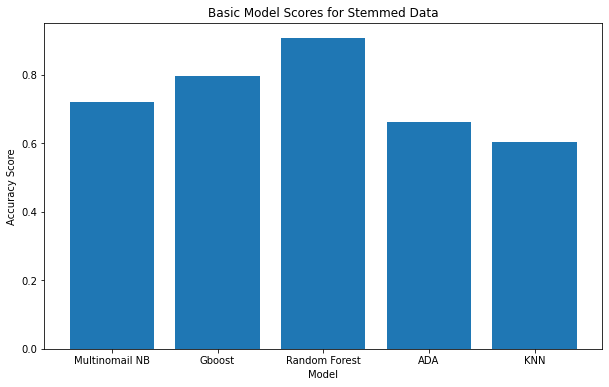

In [255]:
lemmed_lyrics = clean_docs_lemma(lyrics_list)

In [256]:
len(set(lemmed_lyrics))

10237

In [257]:
X = lemmed_lyrics
y = maybe_df.Genre

len(X) == len(y)

True

In [258]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(lemmed_lyrics, maybe_df.Genre, test_size=0.2, random_state=18)

In [259]:
pipe_NB = Pipeline([('count_vectorizer', CountVectorizer()), 
                     ('tfidf_vectorizer', TfidfTransformer()),
                     ('clf', MultinomialNB())
                    ])

pipe_GBoost = Pipeline([('count_vectorizer', CountVectorizer()), 
                     ('tfidf_vectorizer', TfidfTransformer()),
                     ('clf', GradientBoostingClassifier(learning_rate=0.3))
                    ])

pipe_RF = Pipeline([('count_vectorizer', CountVectorizer()), 
                     ('tfidf_vectorizer', TfidfTransformer()),
                     ('clf', RandomForestClassifier())
                    ])

pipe_ADA = Pipeline([('count_vectorizer', CountVectorizer()), 
                     ('tfidf_vectorizer', TfidfTransformer()),
                     ('clf', AdaBoostClassifier(learning_rate=0.3))
                    ])


pipe_KNN = Pipeline([('count_vectorizer', CountVectorizer()), 
                     ('tfidf_vectorizer', TfidfTransformer()),
                     ('clf', KNeighborsClassifier())
                    ])

# List of pipelines, List of pipeline names
pipelines = [pipe_NB, pipe_GBoost, pipe_RF, pipe_ADA, pipe_KNN]
pipeline_names = ['Multinomail NB', "Gboost", 'Random Forest', 'ADA', "KNN"]

# Loop to fit each of the three pipelines
for pipe in pipelines:
    print(pipe)
    pipe.fit(X_train, y_train)

# Compare accuracies
lemmed_basic_scores = []
for index, val in enumerate(pipelines):
    tup = (pipeline_names[index], val.score(X_test, y_test))
    lemmed_basic_scores.append(tup)
    print('%s pipeline test accuracy: %.3f' % (pipeline_names[index], val.score(X_test, y_test)))

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('tfidf_vectorizer', TfidfTransformer()),
                ('clf', MultinomialNB())])
Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('tfidf_vectorizer', TfidfTransformer()),
                ('clf', GradientBoostingClassifier(learning_rate=0.3))])
Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('tfidf_vectorizer', TfidfTransformer()),
                ('clf', RandomForestClassifier())])
Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('tfidf_vectorizer', TfidfTransformer()),
                ('clf', AdaBoostClassifier(learning_rate=0.3))])
Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('tfidf_vectorizer', TfidfTransformer()),
                ('clf', KNeighborsClassifier())])
Multinomail NB pipeline test accuracy: 0.724
Gboost pipeline test accuracy: 0.796
Random Forest pipeline test accuracy: 0.912
ADA pipeline tes

In [260]:
basic_scores

[('Multinomail NB', 0.721),
 ('Gboost', 0.7956666666666666),
 ('Random Forest', 0.9063333333333333),
 ('ADA', 0.6613333333333333),
 ('KNN', 0.6043333333333333)]

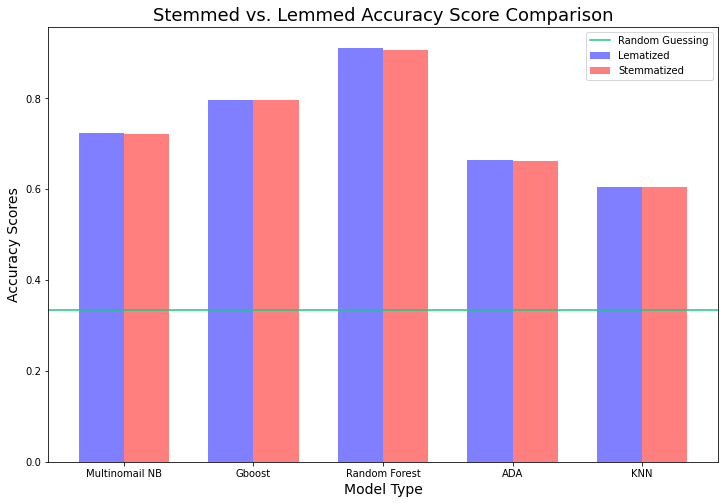

In [261]:
modles_lem = [item[0] for item in lemmed_basic_scores]
accuracy_lem = [item[1] for item in lemmed_basic_scores]

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


n_groups = 5


fig, ax = plt.subplots(figsize = (12, 8))


index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.5
error_config = {'ecolor': '0.3'}

lemmed_bars = ax.bar(index, accuracy_lem, bar_width,
                alpha=opacity, color='b',
                label='Lematized')

stemmed_bars = ax.bar(index + bar_width, accuracy_stem, bar_width,
                alpha=opacity, color='r',
                label='Stemmatized')

ax.set_xlabel('Model Type', fontsize = 14)
ax.set_ylabel('Accuracy Scores', fontsize = 14)
ax.set_title('Stemmed vs. Lemmed Accuracy Score Comparison', fontsize = 18)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(modles_lem)

plt.axhline(y=1/len(set(y)), color='#17CA83', linestyle='-', label = "Random Guessing")
ax.legend()


plt.show()

Next we want to try using PCA to improve performance and reduce dimentionality

In [262]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
response = tfidf.fit_transform(lemmed_lyrics)

PCA_df = pd.DataFrame(response.toarray(), columns=tfidf.get_feature_names())
PCA_df.shape

(15000, 49710)

In [263]:
DATA = response  # this comes from above where you're vectorizing tdif dictionary

non_zero_cols = DATA.nnz / float(DATA.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(DATA.shape[1]))
print('Percentage of columns containing 0: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 96.20253333333334
Percentage of columns containing 0: 0.9980647247368069


In [264]:
PCA_df.head()

aa  aaa  aaaa  aaaaa  aaaaaaa  aaaaaaaa  aaaaaaaaaaaah  aaaaaaaaye  \
0  0.0  0.0   0.0    0.0      0.0       0.0            0.0         0.0   
1  0.0  0.0   0.0    0.0      0.0       0.0            0.0         0.0   
2  0.0  0.0   0.0    0.0      0.0       0.0            0.0         0.0   
3  0.0  0.0   0.0    0.0      0.0       0.0            0.0         0.0   
4  0.0  0.0   0.0    0.0      0.0       0.0            0.0         0.0   

   aaaaaaahhhhhhhh  aaaaaah  ...   zu  zues  zulu  zuma  zung  zyphandile  \
0              0.0      0.0  ...  0.0   0.0   0.0   0.0   0.0         0.0   
1              0.0      0.0  ...  0.0   0.0   0.0   0.0   0.0         0.0   
2              0.0      0.0  ...  0.0   0.0   0.0   0.0   0.0         0.0   
3              0.0      0.0  ...  0.0   0.0   0.0   0.0   0.0         0.0   
4              0.0      0.0  ...  0.0   0.0   0.0   0.0   0.0         0.0   

   zzs  zzzed  zzzt  zzzzoom  
0  0.0    0.0   0.0      0.0  
1  0.0    0.0   0.0      0.0  
2  0.0    0.0   0.0      0.0  
3  0.0    0.0   0.0      0.0  
4  0.0    0.0   0.0      0.0  

[5 rows x 49710 columns]

Creating Features table and Target table and testing first model

In [265]:
X_pca = PCA_df
y_pca = maybe_df.Genre

len(X_pca) == len(y_pca)

True

In [266]:
from sklearn.model_selection import train_test_split  
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=18)

We will test PCA witn n = 1000 on our top 3 models to see if it helps performance

In [267]:
pipe_NB_pca = Pipeline([('pca', PCA(n_components=1000, random_state=18)),
                     ('clf', GaussianNB())
                    ])

pipe_RF_pca = Pipeline([('pca', PCA(n_components=1000, random_state=18)),
                     ('clf', RandomForestClassifier(n_jobs = -1))
                   ])
                  
pipe_GBoost_pca = Pipeline([('pca', PCA(n_components=1000, random_state=18)),
                     ('clf', GradientBoostingClassifier(learning_rate=0.3))
                    ])

# List of pipelines, List of pipeline names
pipelines = [pipe_NB_pca, pipe_RF_pca, pipe_GBoost_pca]
pipeline_names = ['Multinomial NB', "Random Forest", "Gradient Boost"]

# Loop to fit each of the three pipelines
for pipe in pipelines:
    print(pipe)
    pipe.fit(X_train_pca, y_train_pca)

# Compare accuracies
PCA_scores = []
for index, val in enumerate(pipelines):
    tup = (pipeline_names[index], val.score(X_test_pca, y_test_pca))
    lemmed_basic_scores.append(tup)
    print('%s pipeline test accuracy: %.3f' % (pipeline_names[index], val.score(X_test_pca, y_test_pca)))

Pipeline(steps=[('pca', PCA(n_components=1000, random_state=18)),
                ('clf', GaussianNB())])
Pipeline(steps=[('pca', PCA(n_components=1000, random_state=18)),
                ('clf', RandomForestClassifier(n_jobs=-1))])
Pipeline(steps=[('pca', PCA(n_components=1000, random_state=18)),
                ('clf', GradientBoostingClassifier(learning_rate=0.3))])
Multinomial NB pipeline test accuracy: 0.500
Random Forest pipeline test accuracy: 0.877
Gradient Boost pipeline test accuracy: 0.793


In [268]:
PCA1800_results = dict(Multinomail_NB = 0.553,
Gradient_boost = 0.887,
Random_forest =0.811)

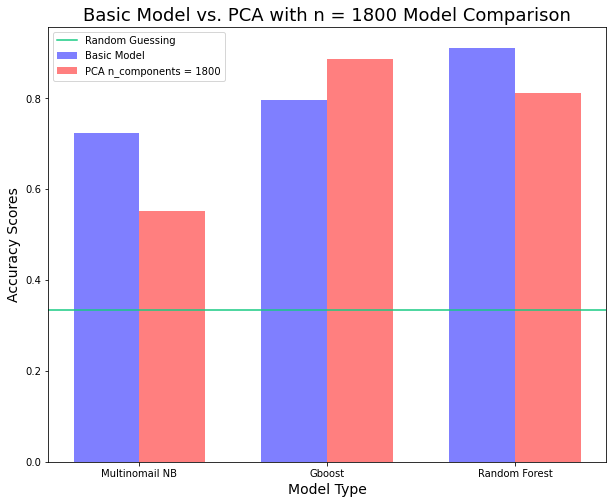

In [269]:
n_groups = 3

basic_mod_name = modles_lem[:3]
basic_mod_acc = accuracy_lem[:3]
pca_models_acc = [item[1] for item in PCA1800_results.items()]

fig, ax = plt.subplots(figsize = (10,8))


index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.5
error_config = {'ecolor': '0.3'}

basic_bars = ax.bar(index, basic_mod_acc, bar_width,
                alpha=opacity, color='b',
                label='Basic Model')

pca_bars = ax.bar(index + bar_width, pca_models_acc , bar_width,
                alpha=opacity, color='r',
                label='PCA n_components = 1800')

ax.set_xlabel('Model Type', fontsize = 14)
ax.set_ylabel('Accuracy Scores', fontsize = 14)
ax.set_title('Basic Model vs. PCA with n = 1800 Model Comparison', fontsize = 18)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(basic_mod_name)

plt.axhline(y=1/len(set(y)), color='#17CA83', linestyle='-', label = "Random Guessing")
ax.legend()
plt.show()

We decided that it's not worth using PCA for our models because it increases computational time and doesn't really improve performance except Gboost.

# Word Clouds Per Genre

In [270]:
rock_df = maybe_df[maybe_df.Genre == "Rock"]
pop_df = maybe_df[maybe_df.Genre == "Pop"]
hiphop_df = maybe_df[maybe_df.Genre == "Hip Hop"]

In [271]:
rock_lyrics = clean_docs_lemma(list(rock_df.Lyric))
pop_lyrics = clean_docs_lemma(list(pop_df.Lyric))
hiphop_lyrics = clean_docs_lemma(list(hiphop_df.Lyric))

In [272]:
import sys
!{sys.executable} -m pip install gensim

In [273]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models

In [274]:
import random
test = random.sample(rock_lyrics, 2000)
lemmed_lyr = [nltk.word_tokenize(doc) for doc in test]

lemmed_lyr
# test
dictionary = gensim.corpora.Dictionary(lemmed_lyr)

count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 5
    if count > 15:
        break

dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

bow_corpus = [dictionary.doc2bow(doc) for doc in lemmed_lyr]

0 amory
1 back
2 boy
3 brink


In [275]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=15, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.017*"time" + 0.015*"love" + 0.014*"get" + 0.013*"day" + 0.012*"got" + 0.012*"still" + 0.012*"way" + 0.011*"friend" + 0.011*"done" + 0.009*"go"
Topic: 1 
Words: 0.031*"time" + 0.018*"im" + 0.014*"let" + 0.013*"day" + 0.013*"heart" + 0.013*"love" + 0.013*"see" + 0.013*"world" + 0.012*"one" + 0.011*"say"
Topic: 2 
Words: 0.021*"oh" + 0.021*"one" + 0.019*"ah" + 0.016*"know" + 0.016*"see" + 0.015*"day" + 0.011*"dont" + 0.010*"never" + 0.010*"better" + 0.010*"life"
Topic: 3 
Words: 0.024*"la" + 0.017*"im" + 0.015*"day" + 0.014*"go" + 0.012*"youre" + 0.011*"eye" + 0.011*"dont" + 0.011*"keep" + 0.011*"like" + 0.010*"night"
Topic: 4 
Words: 0.026*"love" + 0.021*"come" + 0.015*"well" + 0.014*"dont" + 0.014*"na" + 0.013*"know" + 0.013*"tonight" + 0.013*"oh" + 0.012*"baby" + 0.012*"wont"
Topic: 5 
Words: 0.034*"na" + 0.027*"im" + 0.021*"dont" + 0.016*"gon" + 0.015*"love" + 0.014*"ill" + 0.014*"know" + 0.014*"youre" + 0.013*"got" + 0.012*"wan"
Topic: 6 
Words: 0.019*"man" + 0.018

In [276]:
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=15, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.005*"well" + 0.005*"little" + 0.005*"day" + 0.005*"world" + 0.005*"let" + 0.004*"got" + 0.004*"sometimes" + 0.004*"said" + 0.004*"im" + 0.004*"like"
Topic: 1 Word: 0.008*"na" + 0.007*"ready" + 0.006*"love" + 0.006*"oh" + 0.006*"im" + 0.006*"dont" + 0.006*"day" + 0.006*"thing" + 0.006*"boy" + 0.005*"wan"
Topic: 2 Word: 0.009*"yeah" + 0.007*"oh" + 0.006*"na" + 0.006*"dont" + 0.005*"gon" + 0.005*"home" + 0.005*"im" + 0.005*"love" + 0.005*"know" + 0.005*"baby"
Topic: 3 Word: 0.006*"soul" + 0.005*"ya" + 0.005*"ah" + 0.005*"hey" + 0.005*"im" + 0.005*"life" + 0.005*"got" + 0.005*"kiss" + 0.005*"like" + 0.004*"beautiful"
Topic: 4 Word: 0.006*"let" + 0.006*"love" + 0.006*"im" + 0.006*"get" + 0.005*"folk" + 0.005*"gun" + 0.005*"youre" + 0.004*"come" + 0.004*"heart" + 0.004*"oh"
Topic: 5 Word: 0.006*"love" + 0.006*"im" + 0.005*"know" + 0.005*"yeah" + 0.005*"dont" + 0.005*"see" + 0.004*"go" + 0.004*"youre" + 0.004*"feel" + 0.004*"time"
Topic: 6 Word: 0.008*"ta" + 0.007*"got" + 0.0

In [277]:
weights = tfidf[bow_corpus[12]]

# Get terms from the dictionary and pair with weights

weights = [(dictionary[pair[0]], pair[1]) for pair in weights]
weights[-35:]

[('hard', 0.13980976753751073),
 ('never', 0.024258214817574866),
 ('youre', 0.022823688195291646),
 ('ever', 0.03960992411456753),
 ('fall', 0.042750813493697803),
 ('still', 0.0383150604980806),
 ('eye', 0.056943821231968776),
 ('find', 0.10481042296678682),
 ('maybe', 0.057061484402656654),
 ('open', 0.057061484402656654),
 ('saved', 0.08539571625683526),
 ('sit', 0.062486470174962276),
 ('gone', 0.04148218419375606),
 ('losing', 0.31994122477363823),
 ('tell', 0.03458880337455189),
 ('away', 0.08306948215672047),
 ('saw', 0.060004914929374216),
 ('ta', 0.05009249798054238),
 ('already', 0.0818426844682369),
 ('awake', 0.07394109321589877),
 ('blind', 0.25288777275898117),
 ('brings', 0.3110228363652148),
 ('came', 0.054826965537205063),
 ('change', 0.05253164249804473),
 ('dark', 0.2067368669253658),
 ('dream', 0.038595464211520165),
 ('light', 0.1832421408445968),
 ('lose', 0.058379997325803436),
 ('nobody', 0.06224735402328838),
 ('okay', 0.5384656543234503),
 ('somethings', 0.09

In [278]:
!{sys.executable} -m pip install wordcloud

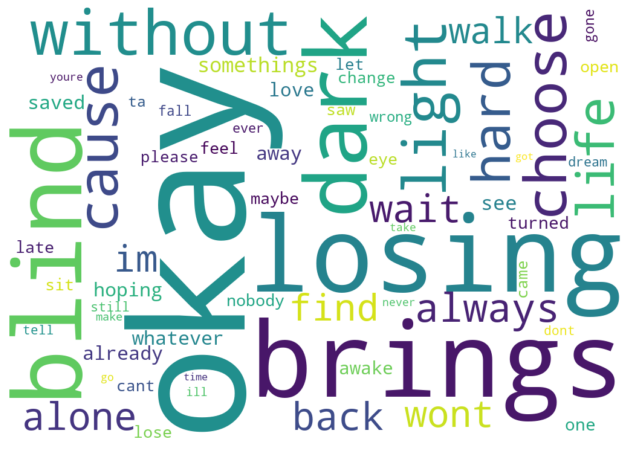

In [279]:
# !pip install wordcloud
from wordcloud import WordCloud

# Initialize the word cloud

d = {}
for a, x in weights:
    d[a] = x
    
wc = WordCloud(
    background_color="white",
    max_words=2000,
    width = 1024,
    height = 720,
    stopwords=stopwords.words("english")
)

# Generate the cloud

wc.generate_from_frequencies(d)
plt.figure(figsize = (12, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [280]:
# Let's pickle it for later use
data_clean_pop = pd.read_pickle("corpus_pop.pkl")
data_clean_rock= pd.read_pickle("corpus_rock.pkl")
data_clean_hiphop= pd.read_pickle("corpus_hiphop.pkl")

Document-Term Matrix
For many of the techniques we'll be using in future notebooks, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's CountVectorizer, where every row will represent a different document and every column will represent a different word.

In addition, with CountVectorizer, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

In [281]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv_pop = CountVectorizer(stop_words='english',min_df =0.1)
data_cv_pop = cv_pop.fit_transform(data_clean_pop.Lyric)
data_dtm_pop = pd.DataFrame(data_cv_pop.toarray(), columns=cv_pop.get_feature_names())
data_dtm_pop.index = data_clean_pop.index
data_dtm_pop

aint  away  baby  believe  better  boy  cause  come  day  did  ...  \
0         0     2     1        0       0    0      1     0    0    0  ...   
1         0     0     0        1       0    0      0     0    0    0  ...   
2         1     0     0        0       0    0      2     1    0    0  ...   
3         0     0     2        0       0    0      0     0    0    0  ...   
4         0     2     0        0       2    0      1     1    0    0  ...   
...     ...   ...   ...      ...     ...  ...    ...   ...  ...  ...  ...   
40289     0     0     2        0       0    0      0     4    0    0  ...   
40290     0     0     0        0       0    0      0     0    0    0  ...   
40291     0     0     0        0       0    0      0     0    8    0  ...   
40292     0     1     0        0       0    0      1     1    0    0  ...   
40293     1     1     3        0       0    0      0     0    0    0  ...   

       wanna  want  way  wont  world  wrong  yeah  youll  youre  youve  
0          0    15    0     6      0      1     2      0      2      0  
1          0     0    0     0      1      0     0      0      0      0  
2          0     0    0     0      2      0     0      0      0      0  
3          0     0    0     0      2      0     9      0      0      0  
4          3     2    6     0      0      0     0      0      0      0  
...      ...   ...  ...   ...    ...    ...   ...    ...    ...    ...  
40289      2     0    1     0      0      0     0      0      1      0  
40290      1     0    0     0      0      0     0      0      1      0  
40291      0     2    0     0      0      0     0      0      0      0  
40292      0     0    2     0      0      0     0      0      0      0  
40293      0     0    1     1      0      0     0      0      2      0  

[40294 rows x 82 columns]

In [282]:
from sklearn.feature_extraction.text import CountVectorizer

cv_rock = CountVectorizer(stop_words='english',min_df =0.1)
data_cv_rock = cv_rock.fit_transform(data_clean_rock.Lyric)
data_dtm_rock = pd.DataFrame(data_cv_rock.toarray(), columns=cv_rock.get_feature_names())
data_dtm_rock.index = data_clean_rock.index
data_dtm_rock

aint  away  baby  better  cause  come  day  dont  eyes  face  ...  \
0         0     0     0       0      0     0    0     0     0     0  ...   
1         0     0     2       0      1     2    0     0     0     0  ...   
2         0     0     0       0      0     0    0     0     0     1  ...   
3         0     1     0       0      0     0    1     1     0     0  ...   
4         0     0     0       0      0     5    0     0     0     1  ...   
...     ...   ...   ...     ...    ...   ...  ...   ...   ...   ...  ...   
60580     0     0     0       0      0     0    0     0     1     1  ...   
60581     0     5     0       0      0     0    0     0     1     0  ...   
60582     0     0     0       0      5     0    0     0     1     0  ...   
60583     0     0     0       0      3     9    0     0     0     0  ...   
60584     0     0     0       0      0     0    0     2     2     0  ...   

       time  try  wanna  want  way  wont  world  yeah  youre  youve  
0         1    0      0     0    4     0      1     0      0      0  
1         1    3      0     0    2     0      0     0      0      0  
2         0    0      0     0    1     0      1     0      0      0  
3         2    0      0     0    0     0      0     0      0      0  
4         0    0      0     0    0     0      0     0      0      0  
...     ...  ...    ...   ...  ...   ...    ...   ...    ...    ...  
60580     0    0      5     1    0     0      4     9      1      0  
60581     0    0      0     0    0     1      0     0      0      0  
60582     0    0      0     1    0     4      0     0      0      0  
60583     1    0      0     0    3     6      0     0      2      0  
60584     4    0      0     0    1     0      2     0      0      0  

[60585 rows x 61 columns]

In [283]:
from sklearn.feature_extraction.text import CountVectorizer

cv_hiphop = CountVectorizer(stop_words='english',min_df =0.1)
data_cv_hiphop = cv_hiphop.fit_transform(data_clean_hiphop.Lyric)
data_dtm_hiphop = pd.DataFrame(data_cv_hiphop.toarray(), columns=cv_hiphop.get_feature_names())
data_dtm_hiphop.index = data_clean_hiphop.index
data_dtm_hiphop

aint  ask  ass  away  baby  bad  beat  believe  best  better  ...  \
0         1    0    0     0     0    0     0        0     0       0  ...   
1         0    0    0     0     0    0     1        0     0       0  ...   
2         0    1    0     1     0    0     0        0     1       0  ...   
3         0    0    1     0     0    0     0        0     0       0  ...   
4         3    0    0     0     0    0     0        0     1       0  ...   
...     ...  ...  ...   ...   ...  ...   ...      ...   ...     ...  ...   
23103     0    0    0     0     2    1     0        0     0       0  ...   
23104     0    0    0     0     0    0     0        0     0       1  ...   
23105     0    0    0     0     0    0     0        0     0       0  ...   
23106     0    0    0     0     0    0     0        0     0       0  ...   
23107     0    0    0     0     0    0     0        0     0       0  ...   

       work  world  wrong  ya  yall  yeah  yo  youll  young  youre  
0         0      0      0   0     2     0   0      1      0      3  
1         0      1      0   0     1     0   0      1      0      1  
2         0      0      0   0     0     1   0      0      0      3  
3         0      0      0   0     0     0   0      0      0      0  
4         0      1      0   0     0     0   0      0      0      1  
...     ...    ...    ...  ..   ...   ...  ..    ...    ...    ...  
23103     7      0      0  11     0     1   1      0      0      3  
23104     1      0      0   0     0     0   0      0      0      1  
23105     0      0     10   0     0     0   0      0      0      1  
23106     0      0      0   0     0     0   0      0      0      0  
23107     0      0      0   0     0     0   0      0      0      0  

[23108 rows x 179 columns]

In [284]:
# Let's pickle it for later use
data_dtm_pop.to_pickle("dtm_pop.pkl")
data_dtm_rock.to_pickle("dtm_rock.pkl")
data_dtm_hiphop.to_pickle("dtm_hiphop.pkl")

In [285]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
import pickle

data_clean_pop.to_pickle('data_clean_pop.pkl')
pickle.dump(cv_pop, open("cv_pop.pkl", "wb"))
data_clean_rock.to_pickle('data_clean_rock.pkl')
pickle.dump(cv_rock, open("cv_rock.pkl", "wb"))
data_clean_hiphop.to_pickle('data_clean_hiphop.pkl')
pickle.dump(cv_hiphop, open("cv_hiphop.pkl", "wb"))

Exploratory Data Analysis
Introduction
After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

Most common words - find these and create word clouds
Size of vocabulary - look number of unique words
Amount of profanity - most common terms
Most Common Words
Analysis

In [286]:
# Read in the document-term matrix
import pandas as pd

data_pop = pd.read_pickle('dtm_pop.pkl')
data_pop = data_pop.transpose()
data_pop

0      1      2      3      4      5      6      7      8      9      \
aint         0      0      1      0      0      0      1      0      0     13   
away         2      0      0      0      2      0      2      0      0      0   
baby         1      0      0      2      0      0      1      1      0      5   
believe      0      1      0      0      0      0      0      4      0      0   
better       0      0      0      0      2      0      0      1      0      0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
wrong        1      0      0      0      0      0      0      0      0      0   
yeah         2      0      0      9      0      0      0     18      0      0   
youll        0      0      0      0      0      0      0      0      0      0   
youre        2      0      0      0      0      0      0      0      0      0   
youve        0      0      0      0      0      3      0      0      0      0   

         ...  40284  40285  40286  40287  40288  40289  40290  40291  40292  \
aint     ...      0      0      0      0      0      0      0      0      0   
away     ...      0      0      0      0      0      0      0      0      1   
baby     ...      0      0      0      0      0      2      0      0      0   
believe  ...      0      0      0      0      0      0      0      0      0   
better   ...      1      0      0      2      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
wrong    ...      0      0      0      0      0      0      0      0      0   
yeah     ...      1      2      2      0      0      0      0      0      0   
youll    ...      0      0      0      0      0      0      0      0      0   
youre    ...      0      0      0      0     30      1      1      0      0   
youve    ...      0      0      0      0      0      0      0      0      0   

         40293  
aint         1  
away         1  
baby         3  
believe      0  
better       0  
...        ...  
wrong        0  
yeah         0  
youll        0  
youre        2  
youve        0  

[82 rows x 40294 columns]

In [287]:
# Find the top 30 words said by each song
top_dict_pop = {}
for c in data_pop.columns:
    top = data_pop[c].sort_values(ascending=False).head(41)
    top_dict_pop[c]= list(zip(top.index, top.values))

top_dict_pop

{0: [('want', 15),
  ('just', 9),
  ('dont', 9),
  ('let', 7),
  ('wont', 6),
  ('im', 6),
  ('hey', 5),
  ('need', 4),
  ('time', 3),
  ('away', 2),
  ('yeah', 2),
  ('youre', 2),
  ('think', 1),
  ('life', 1),
  ('cause', 1),
  ('wrong', 1),
  ('try', 1),
  ('baby', 1),
  ('gotta', 0),
  ('ive', 0),
  ('inside', 0),
  ('believe', 0),
  ('ill', 0),
  ('home', 0),
  ('hold', 0),
  ('better', 0),
  ('heart', 0),
  ('hear', 0),
  ('head', 0),
  ('hard', 0),
  ('boy', 0),
  ('come', 0),
  ('got', 0),
  ('good', 0),
  ('gonna', 0),
  ('gone', 0),
  ('going', 0),
  ('girl', 0),
  ('know', 0),
  ('feel', 0),
  ('fall', 0)],
 1: [('heart', 14),
  ('night', 2),
  ('know', 2),
  ('theres', 2),
  ('im', 2),
  ('oh', 2),
  ('tonight', 1),
  ('got', 1),
  ('said', 1),
  ('head', 1),
  ('love', 1),
  ('dont', 1),
  ('left', 1),
  ('world', 1),
  ('believe', 1),
  ('time', 1),
  ('hey', 0),
  ('hold', 0),
  ('home', 0),
  ('ill', 0),
  ('inside', 0),
  ('hear', 0),
  ('hard', 0),
  ('gotta', 0),
  (

In [288]:
# Print the top 15 words said by each song
for song, top_words in top_dict_pop.items():
    print(', '.join([word for word, count in top_words[0:41]]))
    print('---')

want, just, dont, let, wont, im, hey, need, time, away, yeah, youre, think, life, cause, wrong, try, baby, gotta, ive, inside, believe, ill, home, hold, better, heart, hear, head, hard, boy, come, got, good, gonna, gone, going, girl, know, feel, fall
---
heart, night, know, theres, im, oh, tonight, got, said, head, love, dont, left, world, believe, time, hey, hold, home, ill, inside, hear, hard, gotta, ive, just, youve, good, gonna, away, baby, better, boy, cause, come, day, did, eyes, face, fall, feel
---
ive, time, world, cause, aint, face, gonna, come, hard, head, hear, heart, hey, hold, ill, home, got, im, inside, just, know, leave, left, gotta, gone, good, did, away, baby, believe, better, boy, day, dont, lets, eyes, fall, feel, feeling, girl, going
---
yeah, need, thing, life, tonight, got, love, gotta, world, baby, dont, im, theres, light, feel, mind, new, good, right, know, time, fall, better, inside, away, ill, home, hold, believe, hey, heart, hear, head, hard, boy, face, caus

---
yeah, like, need, girl, come, im, cause, play, want, love, right, dont, good, stop, light, youre, know, really, things, time, way, day, heart, let, lets, better, long, make, gonna, youve, night, gone, baby, hold, hey, eyes, away, hear, head, feel, feeling
---
dont, know, want, mind, stay, say, try, look, girl, make, hard, feel, come, time, yeah, things, ive, heart, head, youve, hear, got, hey, hold, home, ill, im, inside, gotta, feeling, good, gonna, gone, going, fall, face, eyes, did, day, cause, boy
---
little, need, come, dont, love, wont, cause, wanna, im, make, life, right, just, gotta, good, yeah, oh, youre, baby, thing, want, away, really, got, girl, leave, let, man, aint, play, way, thats, new, fall, think, time, tonight, gonna, gone, going, try
---
yeah, like, need, girl, come, cause, want, love, things, good, right, youre, im, know, play, make, night, youve, way, better, time, day, face, away, baby, ill, home, hold, believe, hey, heart, hear, head, hard, boy, fall, gotta,

---
heart, know, let, love, dont, make, long, ive, cause, gotta, just, day, believe, try, need, youll, world, said, say, want, did, time, come, hey, hold, home, ill, hard, hear, head, inside, im, youve, got, good, gonna, gone, going, feeling, feel, fall
---
know, yeah, im, gone, time, let, eyes, want, love, make, feeling, way, like, feel, need, gonna, youre, stay, heart, aint, come, away, cause, ive, inside, baby, believe, ill, better, home, hold, hey, boy, fall, face, hear, head, day, hard, gotta, got
---
oh, just, gone, long, tonight, make, heart, know, time, like, love, feel, eyes, left, way, dont, hear, away, ive, inside, im, baby, ill, home, believe, hold, better, boy, hey, head, did, hard, cause, gotta, got, good, gonna, come, going, girl, feeling
---
love, heart, let, believe, thats, im, going, time, hard, ive, like, fall, make, inside, ill, gotta, home, hold, hey, just, know, leave, hear, head, youve, got, did, away, baby, better, boy, cause, come, day, dont, good, eyes, face, 

---
girl, want, just, dont, like, eyes, im, wrong, good, boy, hard, oh, yeah, lets, love, ive, make, say, believe, need, ill, home, inside, hey, heart, hear, head, hold, youve, gotta, did, away, baby, better, cause, come, day, face, got, fall, feel
---
im, just, mind, dont, like, love, know, wrong, thats, hold, man, light, life, ive, oh, ill, heart, hear, got, did, believe, night, aint, wanna, time, think, world, things, feeling, way, head, hard, gotta, wont, good, gonna, gone, going, girl, said, want
---
like, want, dont, got, know, come, just, youre, im, right, little, girl, mind, make, really, left, good, look, let, man, ill, oh, aint, feeling, feel, thats, away, better, way, wanna, turn, cause, tell, stop, stay, hold, baby, heart, hear, believe, head
---
wanna, just, dont, night, like, better, want, time, going, oh, look, got, know, world, im, need, said, long, man, gotta, make, right, let, love, light, youre, fall, think, inside, away, hard, head, hear, heart, youve, gone, good, g

night, light, let, face, home, hard, head, hear, heart, hey, hold, ill, got, im, inside, ive, just, know, leave, left, gotta, youve, lets, gonna, away, baby, believe, better, boy, cause, come, day, did, dont, eyes, fall, feel, feeling, girl, going, gone
---
said, right, im, just, really, theres, like, look, love, make, got, yeah, know, say, aint, fall, head, ive, inside, away, ill, home, better, hold, hey, heart, boy, cause, come, hear, hard, feel, gotta, day, good, gonna, believe, did, dont, eyes, gone
---
left, like, leave, im, time, youll, believe, think, really, got, mind, man, love, hold, heart, let, know, just, ill, night, inside, wrong, tell, come, things, feel, hear, away, baby, better, boy, cause, home, hey, day, did, hard, head, feeling, gotta, dont
---
good, im, got, like, know, dont, make, cause, feel, wanna, turn, youre, tell, need, time, boy, leave, wont, long, love, baby, girl, hard, just, heart, ill, gone, aint, play, night, stop, yeah, world, way, feeling, day, thing, 

need, im, tonight, know, youll, world, baby, wanna, just, dont, time, love, leave, really, think, way, like, wrong, night, stay, say, aint, good, ill, home, thing, yeah, better, thats, got, away, hey, heart, believe, boy, hear, head, hard, gotta, did, hold
---
im, good, love, hard, know, way, think, dont, ill, heart, need, got, tell, say, ive, yeah, hold, long, cause, did, better, just, inside, away, home, hey, baby, believe, hear, head, boy, eyes, gotta, come, gonna, gone, going, leave, girl, feeling, day
---
im, yeah, oh, like, aint, got, left, know, stop, dont, want, mind, come, time, wanna, right, just, boy, way, fall, face, ive, away, inside, baby, ill, home, believe, hold, hey, heart, hear, head, hard, gotta, cause, better, good, gonna, day, gone
---
better, cause, know, love, mind, youre, yeah, like, home, boy, said, time, heart, life, dont, day, eyes, did, just, away, ive, baby, inside, im, ill, believe, come, hold, hey, hear, face, head, hard, gotta, got, good, leave, gone, go

yeah, love, im, cause, head, heart, really, ive, wont, oh, fall, like, mind, gonna, just, stop, girl, wanna, life, think, make, good, time, hard, did, dont, ill, away, better, hold, hey, inside, baby, believe, hear, home, eyes, boy, face, got, come
---
make, love, youre, like, cause, im, know, stop, dont, boy, wanna, way, want, turn, aint, face, gotta, got, lets, good, going, really, right, tell, baby, believe, think, time, stay, fall, head, home, away, hold, hey, heart, hear, better, come, hard, day
---
like, oh, make, let, day, ill, im, boy, love, hey, baby, theres, better, think, turn, hear, want, say, lets, live, hard, fall, night, life, tonight, dont, way, wanna, things, face, home, hold, away, heart, believe, head, cause, gotta, come, feeling, got
---
heart, try, believe, know, im, feeling, dont, left, feel, hold, hard, head, hear, hey, youve, home, got, ill, inside, ive, just, leave, gotta, gone, good, day, away, baby, better, boy, cause, come, did, gonna, eyes, face, fall, girl

like, mind, time, think, said, got, need, thats, wanna, youve, gotta, hard, head, hear, heart, gonna, hey, hold, home, ill, im, inside, ive, just, good, going, gone, day, away, baby, believe, better, boy, cause, come, did, leave, dont, eyes, face, fall
---
yeah, cause, way, heart, say, stay, day, dont, ill, did, like, night, want, girl, make, gonna, gotta, better, know, just, things, look, good, baby, believe, wont, wanna, right, said, let, left, hard, hey, hear, home, head, hold, youve, got, gone, going
---
going, im, time, got, gonna, ive, lets, youre, make, right, dont, know, better, gotta, love, wont, ill, theres, yeah, way, man, heart, live, hear, hold, hey, home, baby, away, inside, believe, day, head, hard, come, good, gone, boy, girl, feeling, feel
---
lets, life, time, gonna, oh, let, look, baby, world, left, dont, im, make, mind, got, like, night, yeah, wrong, said, thats, tell, long, theres, thing, things, day, come, know, just, hear, hard, gotta, head, good, heart, feeling,

---
feel, head, baby, come, wanna, dont, thing, time, yeah, im, just, want, youre, like, make, said, ill, need, lets, let, know, got, home, hold, hey, heart, hear, inside, hard, youve, gotta, good, away, believe, better, boy, cause, day, did, eyes, face
---
better, boy, really, know, youre, dont, said, yeah, just, gone, want, wanna, cause, im, like, ive, baby, wrong, got, gotta, inside, ill, home, hold, hey, heart, hear, head, hard, youve, good, gonna, leave, girl, feeling, feel, fall, face, eyes, did, day
---
im, long, youre, love, come, like, know, got, cause, hold, just, thats, baby, little, make, need, ill, tell, aint, feel, yeah, boy, feeling, eyes, ive, inside, away, believe, better, home, day, did, dont, hey, girl, heart, face, hear, head, hard, gotta
---
like, love, want, im, got, girl, know, boy, wanna, try, thing, going, good, wont, inside, yeah, make, head, hard, gotta, youve, hear, heart, hey, home, ill, ive, hold, feeling, gonna, gone, feel, fall, face, eyes, dont, did, da

---
got, im, time, dont, gonna, ill, theres, thing, man, youve, really, need, like, just, youre, let, say, inside, hard, come, right, aint, want, wanna, thats, stay, feel, hear, head, wont, gotta, world, good, wrong, gone, going, girl, feeling, fall, hey, face
---
say, face, love, stay, gone, new, man, tonight, youre, away, ill, home, hold, im, got, hey, inside, ive, heart, hear, head, just, hard, gotta, youve, good, did, baby, believe, better, boy, cause, come, day, dont, gonna, eyes, fall, feel, feeling, girl
---
just, want, little, feel, make, oh, know, cause, gone, day, heart, feeling, youve, hear, hey, ill, hold, home, hard, im, inside, ive, leave, head, gonna, gotta, got, away, baby, believe, better, boy, come, did, dont, eyes, face, fall, girl, going, let
---
oh, gone, dont, im, ill, time, cause, look, want, good, heart, life, did, head, leave, know, just, ive, inside, away, baby, believe, home, hold, hey, better, hear, boy, day, hard, gotta, got, come, gonna, let, going, girl, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




right, gonna, heart, yeah, like, live, wanna, life, just, inside, light, little, im, hold, head, know, world, eyes, face, day, away, ive, baby, believe, better, boy, cause, ill, home, come, hey, hear, fall, did, hard, gotta, got, good, dont, leave, going
---
im, dont, heart, time, wanna, yeah, just, let, cause, say, tell, youre, like, make, mind, need, gone, stop, feel, way, try, want, eyes, gotta, away, ill, home, hold, baby, hey, believe, better, hear, head, hard, got, did, good, boy, gonna, come
---
try, im, think, time, like, love, got, gotta, hard, head, hear, heart, hey, youve, hold, gonna, home, ill, inside, ive, just, know, good, going, gone, day, away, baby, believe, better, boy, cause, come, did, left, dont, eyes, face, fall, feel, feeling
---
baby, let, dont, wanna, like, love, hold, got, theres, night, just, im, way, need, know, hear, head, hard, home, heart, hey, ill, inside, ive, gotta, youve, good, did, away, believe, better, boy, cause, come, day, eyes, gonna, face, fa

hard, heart, ill, like, im, yeah, leave, stop, thats, way, wont, youre, just, head, gotta, got, youve, home, hear, hey, hold, gonna, inside, ive, good, girl, gone, going, away, baby, believe, better, boy, cause, come, day, did, dont, eyes, face, fall
---
oh, dont, face, want, baby, better, love, play, come, lets, yeah, youll, got, need, little, hear, hard, head, heart, home, hey, hold, gotta, ill, im, inside, ive, youve, gone, good, gonna, know, going, girl, feeling, feel, fall, eyes, did, day, cause
---
dont, know, going, look, wrong, wont, cause, fall, left, eyes, gonna, stop, theres, life, im, gotta, hold, home, ill, hey, heart, inside, ive, hear, just, head, hard, girl, got, good, gone, feeling, feel, face, did, day, come, boy, better, believe, baby
---
im, youll, ill, know, just, like, feel, cause, wont, way, live, oh, time, day, youre, ive, feeling, life, world, face, hear, away, inside, baby, believe, better, boy, home, hold, hey, heart, head, fall, hard, gotta, got, come, good,

like, got, come, tell, just, know, im, love, make, say, better, world, youre, ill, hard, need, new, let, home, aint, baby, way, wanna, did, feeling, hear, away, inside, believe, boy, cause, hold, hey, heart, day, girl, head, dont, eyes, face, gotta
---
let, love, like, hear, cause, away, know, better, say, gone, dont, time, youve, hold, heart, hey, im, home, ill, hard, inside, ive, just, leave, head, gonna, gotta, eyes, baby, believe, boy, come, day, did, face, got, fall, feel, feeling, girl, going
---
im, love, know, just, come, like, hard, thing, things, aint, say, cause, heart, really, way, stop, lets, dont, inside, away, baby, better, ill, home, hold, hey, ive, believe, hear, head, day, gotta, got, did, gonna, gone, going, boy, girl, feeling, feel
---
really, stay, gonna, life, youre, baby, yeah, like, know, wanna, make, just, play, need, got, look, love, hard, im, heart, home, live, ill, day, cause, feeling, feel, way, dont, time, say, away, believe, better, hold, hey, boy, hear, 

got, like, know, make, thats, just, come, day, new, want, im, need, night, right, let, gotta, look, good, really, ill, youll, yeah, tell, away, dont, world, fall, baby, home, hold, hey, heart, hear, head, hard, better, believe, feel, boy, cause, gonna
---
night, long, play, tell, baby, just, youre, like, got, im, know, left, heart, feel, love, said, stay, feeling, right, time, tonight, cause, want, fall, head, away, believe, ill, better, home, hold, boy, hey, hear, come, day, face, hard, gotta, did, good
---
things, said, im, say, away, good, heart, did, like, know, thats, think, tell, love, dont, want, got, man, lets, play, hard, girl, gone, fall, thing, way, world, make, head, hear, gotta, hey, hold, home, youve, gonna, going, feeling, feel, face, eyes
---
hey, night, baby, say, day, come, just, stop, want, like, really, right, way, away, girl, man, make, got, love, time, tonight, cause, turn, boy, world, believe, hold, good, heart, ill, hear, head, hard, gotta, home, youve, gonna, g

---
things, feel, try, away, got, home, im, look, say, know, day, think, man, way, better, left, youll, really, hear, head, hard, youve, heart, hey, hold, ill, inside, ive, gotta, girl, good, gonna, gone, going, feeling, fall, face, eyes, dont, did, come
---
love, like, time, make, feel, say, believe, know, ive, hey, gotta, hard, head, hear, heart, hold, inside, just, home, got, ill, im, youve, gonna, good, did, away, baby, better, boy, cause, come, day, dont, left, eyes, face, fall, feeling, girl, going
---
time, away, gone, going, way, cause, come, turn, tonight, tell, hold, hard, head, hear, heart, hey, youve, home, ill, got, im, inside, ive, just, know, gotta, feeling, good, gonna, girl, left, feel, fall, face, eyes, dont, did, day, boy, better, believe
---
know, like, love, way, make, world, want, gone, things, hold, wrong, say, come, time, gotta, hard, hear, head, youve, heart, hey, good, home, ill, im, inside, ive, got, feeling, gonna, day, away, baby, believe, better, boy, caus

look, stop, better, hey, theres, time, think, life, away, come, day, got, ive, youre, man, right, aint, wrong, thing, girl, home, hold, way, heart, hear, head, hard, gotta, wont, good, gonna, gone, going, feeling, im, feel, fall, face, eyes, dont, did
---
youre, love, im, dont, gonna, play, heart, right, like, know, inside, ive, ill, gotta, home, hold, hey, just, hear, head, hard, youve, good, got, left, away, baby, believe, better, boy, cause, come, day, did, eyes, face, fall, feel, feeling, girl, going
---
oh, wanna, look, know, wrong, believe, feel, got, hold, hard, head, hear, heart, hey, youve, home, ill, im, inside, ive, just, leave, gotta, gone, good, did, away, baby, better, boy, cause, come, day, dont, gonna, eyes, face, fall, feeling, girl, going
---
man, away, wont, day, theres, hear, im, night, world, look, youve, hey, hard, head, heart, home, hold, got, ill, inside, ive, just, know, gotta, gone, good, dont, baby, believe, better, boy, cause, come, did, eyes, gonna, face, f

---
going, like, world, love, right, know, tell, time, let, light, ill, things, life, dont, eyes, away, ive, inside, baby, believe, im, better, home, hold, boy, hey, heart, hear, head, hard, gotta, got, good, gonna, cause, gone, come, girl, feeling, day, feel
---
going, know, tell, like, world, love, right, let, im, ill, need, life, youll, did, head, just, ive, inside, away, baby, believe, home, hold, better, hey, heart, hear, boy, hard, dont, gotta, got, good, cause, gonna, leave, come, girl, day, feeling, feel
---
come, live, need, ill, know, man, like, did, just, mind, tell, make, love, little, home, way, world, im, inside, hard, hey, heart, hold, ive, hear, head, youve, gotta, got, away, baby, believe, better, boy, cause, day, dont, eyes, face, fall, feel
---
theres, say, im, eyes, just, light, inside, look, night, right, feel, face, leave, dont, did, head, know, away, baby, ive, believe, better, ill, boy, home, hold, hey, heart, hear, cause, fall, hard, gotta, got, come, good, lef

---
need, right, just, wanna, know, dont, said, day, ill, want, believe, away, im, inside, got, ive, home, hold, hey, heart, hear, head, hard, gotta, youve, gone, good, eyes, baby, better, boy, cause, come, did, face, gonna, fall, feel, feeling, girl, going
---
know, oh, got, yeah, life, away, good, gonna, boy, dont, cause, turn, try, day, time, make, home, said, believe, heart, hear, im, hey, hold, ill, hard, inside, ive, just, head, gone, gotta, baby, better, leave, girl, feeling, feel, fall, face, eyes
---
want, baby, know, dont, feeling, good, oh, let, tell, hear, got, im, just, like, ill, hard, home, hold, hey, heart, inside, ive, head, leave, youve, gone, gotta, day, away, believe, better, boy, cause, come, did, gonna, eyes, face, fall, feel, girl
---
let, inside, know, way, things, think, feel, did, im, want, love, got, feeling, life, oh, tell, like, ive, heart, just, cause, dont, day, try, fall, away, baby, believe, better, ill, boy, home, hold, hey, hear, come, face, head, har

---
say, left, let, eyes, inside, face, gotta, hard, head, hear, heart, hey, home, hold, ill, im, ive, just, know, leave, got, youve, good, day, away, baby, believe, better, boy, cause, come, did, lets, dont, fall, feel, feeling, girl, going, gone, gonna
---
im, live, world, say, theres, try, love, man, hard, life, youll, come, hold, head, hear, believe, heart, baby, hey, away, gotta, home, ill, inside, ive, just, better, got, cause, fall, day, did, dont, eyes, face, boy, feel, good, feeling, girl, leave
---
want, life, tell, right, fall, know, like, wanna, little, look, love, say, eyes, face, girl, youre, need, world, stay, im, youll, things, boy, cause, ill, believe, home, hold, hey, heart, better, hear, away, head, hard, come, dont, gotta, got, good, day
---
got, thing, dont, aint, oh, youve, just, gotta, wont, hey, good, yeah, hard, head, hear, heart, hold, way, home, ill, im, inside, ive, know, gonna, gone, going, girl, away, baby, believe, better, boy, cause, come, day, did, youl

---
hey, love, come, got, girl, night, want, say, thing, im, ill, play, stop, know, dont, face, hard, just, ive, inside, away, baby, home, hold, believe, better, heart, hear, head, gotta, fall, boy, cause, day, good, gonna, gone, leave, going, did, feeling
---
girl, yeah, got, dont, mind, like, ive, way, tell, head, gotta, hard, hear, heart, youve, hey, good, home, ill, im, inside, just, know, hold, going, gonna, gone, away, baby, believe, better, boy, cause, come, day, did, eyes, face, fall, feel, feeling
---
time, fall, dont, think, ive, like, away, new, say, play, head, live, face, life, did, day, im, wont, inside, youll, need, hold, home, ill, hey, heart, hear, hard, gotta, going, got, good, gonna, gone, know, girl, feeling, feel, eyes, come, cause
---
gotta, dont, cause, going, oh, got, gonna, try, ive, inside, im, ill, just, know, home, hold, hey, heart, hear, leave, left, head, hard, youve, good, lets, away, baby, believe, better, boy, come, day, did, eyes, face, fall, feel, fee

face, like, love, fall, want, youre, world, eyes, youve, hard, head, hear, heart, hey, hold, ill, home, got, im, inside, ive, just, know, gotta, gone, good, gonna, away, baby, believe, better, boy, cause, come, day, did, dont, feel, feeling, girl, going
---
little, youre, need, night, just, gonna, look, love, new, youve, head, hear, heart, home, hey, hold, gotta, ill, im, inside, ive, hard, got, leave, did, away, baby, believe, better, boy, cause, come, day, dont, good, eyes, face, fall, feel, feeling, girl
---
dont, say, stay, wanna, got, youve, said, head, man, thats, want, just, gonna, cause, love, boy, hard, hear, heart, away, hey, hold, home, ill, im, inside, ive, gotta, gone, good, going, leave, baby, girl, feeling, feel, fall, face, eyes, believe, did
---
new, heart, life, love, night, need, try, hard, look, make, time, know, day, wont, left, theres, thats, ill, hear, better, believe, baby, head, did, away, hey, gotta, home, im, inside, hold, cause, boy, come, got, good, gonna, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



---
like, im, feeling, gonna, right, love, just, way, fall, make, time, new, play, let, hold, head, mind, leave, ill, youve, inside, face, wanna, eyes, dont, yeah, baby, think, tonight, want, away, home, believe, better, hey, heart, hear, got, hard, gotta, feel
---
oh, got, im, feel, just, baby, like, gone, know, yeah, ive, ill, hard, dont, love, aint, wrong, eyes, cause, come, fall, heart, away, believe, better, inside, boy, home, hold, hey, hear, face, head, day, did, gotta, good, gonna, left, going, girl
---
life, yeah, just, oh, like, time, baby, dont, ill, know, wanna, need, going, youre, aint, come, hard, im, way, say, got, love, gone, gonna, good, gotta, things, head, hear, heart, hey, hold, home, world, feeling, girl, feel, fall, face, eyes, wrong
---
let, ill, youre, im, mind, like, know, tell, tonight, just, gonna, love, believe, come, baby, think, heart, ive, feeling, home, got, man, need, left, aint, said, away, boy, way, want, theres, time, did, better, hold, cause, hey, d

---
day, youre, face, stop, time, really, ive, say, hey, just, night, stay, love, thing, eyes, im, youll, heart, hold, hear, home, head, ill, inside, hard, gotta, got, good, youve, gonna, come, away, baby, believe, better, boy, cause, did, gone, dont, fall
---
know, youre, love, just, way, like, cause, stop, dont, ill, hey, hard, head, hear, heart, youve, hold, home, got, im, inside, ive, gotta, gone, good, did, away, baby, believe, better, boy, come, day, eyes, gonna, face, fall, feel, feeling, girl, going
---
oh, let, think, gonna, just, light, night, need, dont, fall, head, hear, heart, hold, hey, gotta, home, ill, im, inside, ive, know, leave, hard, youve, got, day, away, baby, believe, better, boy, cause, come, did, left, eyes, face, feel, feeling, girl
---
gonna, just, way, love, like, dont, youre, know, cause, stop, ill, hey, hard, head, hear, heart, youve, hold, home, got, im, inside, ive, gotta, gone, good, left, away, baby, believe, better, boy, come, day, did, eyes, face, fa

let, want, know, ill, tell, mind, good, need, oh, heart, girl, like, dont, yeah, got, hey, look, youve, just, hold, hear, gotta, come, cause, baby, night, aint, time, thing, say, fall, head, hard, try, turn, wanna, gonna, gone, going, way, feeling
---
im, cause, tell, yeah, thats, think, dont, time, feel, like, let, wanna, love, look, eyes, know, just, did, ill, world, going, feeling, gotta, thing, gonna, need, light, turn, try, hold, believe, hey, baby, away, heart, hear, home, day, boy, head, hard
---
oh, im, dont, face, inside, cause, fall, got, way, wanna, like, mind, good, gonna, stop, look, leave, need, turn, gotta, hey, heart, hold, hear, head, home, ill, ive, just, youve, hard, know, going, girl, feeling, feel, eyes, did, day, come, boy
---
im, make, oh, youre, play, think, know, like, hard, got, yeah, feel, let, hey, ive, youve, look, love, home, really, just, away, way, dont, going, come, inside, baby, believe, ill, better, boy, hold, cause, heart, day, gone, did, hear, head,

---
youre, baby, girl, need, im, just, hey, world, feel, time, tell, like, got, wanna, gonna, right, love, way, oh, gotta, know, night, look, lets, make, ive, new, eyes, say, cause, feeling, thats, stay, life, gone, fall, away, heart, boy, believe, come
---
im, gonna, heart, baby, fall, know, dont, theres, love, got, wanna, like, leave, inside, gotta, ill, home, ive, hold, just, hey, hear, head, hard, youve, gone, good, day, away, believe, better, boy, cause, come, did, let, eyes, face, feel, feeling, girl
---
im, gonna, heart, baby, fall, know, say, feel, tell, dont, theres, gotta, really, love, thats, got, think, little, like, wanna, leave, hold, home, ill, inside, hear, ive, head, hard, hey, youve, good, gone, going, just, feeling, face, eyes, did, day, come
---
say, thats, oh, know, just, youre, im, let, cause, inside, said, stop, girl, want, dont, going, ive, baby, leave, light, look, think, night, life, eyes, try, tell, feeling, hey, away, face, believe, fall, home, better, hold,

In [289]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each song
words = []
for song in data_pop.columns:
    top = [word for (word, count) in top_dict_pop[song]]
    for t in top:
        words.append(t)
        
words

['want',
 'just',
 'dont',
 'let',
 'wont',
 'im',
 'hey',
 'need',
 'time',
 'away',
 'yeah',
 'youre',
 'think',
 'life',
 'cause',
 'wrong',
 'try',
 'baby',
 'gotta',
 'ive',
 'inside',
 'believe',
 'ill',
 'home',
 'hold',
 'better',
 'heart',
 'hear',
 'head',
 'hard',
 'boy',
 'come',
 'got',
 'good',
 'gonna',
 'gone',
 'going',
 'girl',
 'know',
 'feel',
 'fall',
 'heart',
 'night',
 'know',
 'theres',
 'im',
 'oh',
 'tonight',
 'got',
 'said',
 'head',
 'love',
 'dont',
 'left',
 'world',
 'believe',
 'time',
 'hey',
 'hold',
 'home',
 'ill',
 'inside',
 'hear',
 'hard',
 'gotta',
 'ive',
 'just',
 'youve',
 'good',
 'gonna',
 'away',
 'baby',
 'better',
 'boy',
 'cause',
 'come',
 'day',
 'did',
 'eyes',
 'face',
 'fall',
 'feel',
 'ive',
 'time',
 'world',
 'cause',
 'aint',
 'face',
 'gonna',
 'come',
 'hard',
 'head',
 'hear',
 'heart',
 'hey',
 'hold',
 'ill',
 'home',
 'got',
 'im',
 'inside',
 'just',
 'know',
 'leave',
 'left',
 'gotta',
 'gone',
 'good',
 'did',
 'aw

In [290]:
# Let's aggregate this list and identify the most common words along with how many songs they occur in
Counter(words).most_common()

[('got', 39215),
 ('hear', 39068),
 ('heart', 39048),
 ('head', 38935),
 ('im', 38920),
 ('hard', 38657),
 ('hey', 38598),
 ('gotta', 38490),
 ('hold', 38174),
 ('dont', 37521),
 ('home', 37340),
 ('ill', 36652),
 ('good', 36285),
 ('cause', 35880),
 ('baby', 35820),
 ('come', 34331),
 ('away', 34218),
 ('just', 33788),
 ('gonna', 33696),
 ('better', 33173),
 ('day', 32796),
 ('believe', 32678),
 ('boy', 32532),
 ('know', 32504),
 ('inside', 31944),
 ('feel', 31860),
 ('eyes', 31449),
 ('did', 31405),
 ('face', 30816),
 ('ive', 30485),
 ('fall', 29981),
 ('girl', 28884),
 ('feeling', 28308),
 ('gone', 28078),
 ('going', 25860),
 ('youve', 22230),
 ('like', 21612),
 ('love', 19637),
 ('let', 16359),
 ('youre', 16165),
 ('time', 15856),
 ('leave', 14484),
 ('way', 14328),
 ('make', 14108),
 ('say', 14088),
 ('oh', 14049),
 ('want', 13352),
 ('yeah', 12555),
 ('wanna', 11718),
 ('right', 11182),
 ('need', 10917),
 ('tell', 10642),
 ('life', 9685),
 ('think', 9480),
 ('world', 9235),
 ('le